In [321]:
import warnings
warnings.filterwarnings('ignore')

In [322]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math

# raw 데이터 조작

In [323]:
df = pd.read_pickle('./dataset/integrated_purchase.pkl')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   orderno   10000 non-null  int32         
 1   date      10000 non-null  datetime64[ns]
 2   day       10000 non-null  object        
 3   time      10000 non-null  object        
 4   cus_id    10000 non-null  int32         
 5   product   10000 non-null  category      
 6   price     10000 non-null  int32         
 7   quantity  10000 non-null  int32         
 8   amount    10000 non-null  int32         
 9   gender    10000 non-null  int32         
 10  age       10000 non-null  int32         
 11  region    10000 non-null  int32         
dtypes: category(1), datetime64[ns](1), int32(8), object(2)
memory usage: 634.8+ KB


,orderno,date,day,time,cus_id,product,price,quantity,amount,gender,age,region
0,0,2020-01-01,Wed,03:35:15,733,20,14440,56,808640,0,72,0
1,1,2020-01-01,Wed,06:46:52,692,10,40740,49,1996260,1,63,2
2,2,2020-01-01,Wed,07:54:42,764,30,5520,2,11040,0,76,1
3,3,2020-01-01,Wed,09:10:55,459,30,8630,4,34520,1,31,0
4,4,2020-01-01,Wed,13:30:43,760,20,19970,6,119820,0,89,0


## 반영할 인사이트

### 사용자 정의 함수

In [324]:
def decrease_by_for(by, for_): # for_ % 만큼의 값들에게 by %만큼감소 적용
    if np.random.randint(100) > for_: 
        return 1.0
    else:
        mul = ((100-by)/100) + np.random.uniform(0.0, 0.1)
        return round(mul, 3)
for i in range(10):
    print(decrease_by_for(50, 50))

0.537
0.565
0.546
0.512
0.591
1.0
0.512
0.535
1.0
1.0


In [325]:
def increase_by_for(by, for_): # for_ % 만큼의 값들에게 by %만큼증가 적용
    if np.random.randint(100) > for_: 
        return 1.0
    else:
        mul = ((100+by)/100) + np.random.uniform(0.0, 0.1)
        return round(mul, 3)

### 남성, 30-50대, 고가 -> 매출 증가

- 조작 전 매출 확인

In [326]:
df1 = df.copy()

print(f'*****columns = {df1.columns}')

print('\n//**********info**********//')
df1.info()
print('\n')

df1.rename({'product':'product_'}, axis=1, inplace=True)

condition1 = (df1.gender == 0)&((df1.age >=30)&(df1.age < 60))&(df1.product_ == 10 )
print('*****1만개 중 ', condition1.sum(), '개 해당')

print('\n//**********조작전**********//')
print('*****2020년 매출', round(df1.amount[condition1 & (df1.date.dt.year == 2020)].sum()/10**8, 2), '천만원')
print('*****2021년 매출', round(df1.amount[condition1 & (df1.date.dt.year == 2021)].sum()/10**8, 2), '천만원')

print('\n*****2020년 물건 갯수', round(df1.quantity[condition1 & (df1.date.dt.year == 2020)].sum()/10**4, 1), '만개')
print('*****2021년 물건 갯수', round(df1.quantity[condition1 & (df1.date.dt.year == 2021)].sum()/10**4, 1), '만개')

*****columns = Index(['orderno', 'date', 'day', 'time', 'cus_id', 'product', 'price',
       'quantity', 'amount', 'gender', 'age', 'region'],
      dtype='object')

//**********info**********//
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   orderno   10000 non-null  int32         
 1   date      10000 non-null  datetime64[ns]
 2   day       10000 non-null  object        
 3   time      10000 non-null  object        
 4   cus_id    10000 non-null  int32         
 5   product   10000 non-null  category      
 6   price     10000 non-null  int32         
 7   quantity  10000 non-null  int32         
 8   amount    10000 non-null  int32         
 9   gender    10000 non-null  int32         
 10  age       10000 non-null  int32         
 11  region    10000 non-null  int32         
dtypes: category(1), datetime64[ns](1), int32(8), obj

- 조작 하기
- quantity, amount 수정

In [327]:
sr_q = df1.quantity[condition1 & (df1.date.dt.year == 2021)]

sr_q = sr_q.apply(lambda x : x*increase_by_for(50, 50))

df1.quantity[condition1 & (df1.date.dt.year == 2021)] = sr_q.apply(lambda x : math.ceil(x))

df1.quantity.astype('int')
print()

In [328]:
df1.amount = df1.price*df1.quantity

In [329]:
print('\n//**********조작후**********//')

print('*****2020년 매출', round(df1.amount[condition1 & (df1.date.dt.year == 2020)].sum()/10**8, 2), '천만원')
print('*****2021년 매출', round(df1.amount[condition1 & (df1.date.dt.year == 2021)].sum()/10**8, 2), '천만원')

print('\n*****2020년 물건 갯수', round(df1.quantity[condition1 & (df1.date.dt.year == 2020)].sum()/10**4, 1), '만개')
print('*****2021년 물건 갯수', round(df1.quantity[condition1 & (df1.date.dt.year == 2021)].sum()/10**4, 1), '만개')


//**********조작후**********//
*****2020년 매출 8.76 천만원
*****2021년 매출 10.89 천만원

*****2020년 물건 갯수 2.2 만개
*****2021년 물건 갯수 2.7 만개


- 50%에 대한 50%니까 25% 증가

### 여성, 20-40대, 저가 -> 매출 증가

- 조작 전 매출 확인

In [330]:
df2 = df1.copy()

print(f'*****columns = {df2.columns}')

print('\n//**********info**********//')
df2.info()
print('\n')

df2.rename({'product':'product_'}, axis=1, inplace=True)

condition2 = (df2.gender == 1)&((df2.age >=20)&(df2.age < 50))&(df2.product_ == 30 )
print('*****1만개 중 ', condition2.sum(), '개 해당')

print('\n//**********조작전**********//')
print('*****2020년 매출', round(df2.amount[condition2 & (df2.date.dt.year == 2020)].sum()/10**8, 2), '천만원')
print('*****2021년 매출', round(df2.amount[condition2 & (df2.date.dt.year == 2021)].sum()/10**8, 2), '천만원')

print('\n*****2020년 물건 갯수', round(df2.quantity[condition2 & (df2.date.dt.year == 2020)].sum()/10**4, 1), '만개')
print('*****2021년 물건 갯수', round(df2.quantity[condition2 & (df2.date.dt.year == 2021)].sum()/10**4, 1), '만개')

*****columns = Index(['orderno', 'date', 'day', 'time', 'cus_id', 'product_', 'price',
       'quantity', 'amount', 'gender', 'age', 'region'],
      dtype='object')

//**********info**********//
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   orderno   10000 non-null  int32         
 1   date      10000 non-null  datetime64[ns]
 2   day       10000 non-null  object        
 3   time      10000 non-null  object        
 4   cus_id    10000 non-null  int32         
 5   product_  10000 non-null  category      
 6   price     10000 non-null  int32         
 7   quantity  10000 non-null  int32         
 8   amount    10000 non-null  int32         
 9   gender    10000 non-null  int32         
 10  age       10000 non-null  int32         
 11  region    10000 non-null  int32         
dtypes: category(1), datetime64[ns](1), int32(8), ob

- 조작 하기
- quantity, amount 수정

In [331]:
sr_q = df2.quantity[condition2 & (df2.date.dt.year == 2021)]

sr_q = sr_q.apply(lambda x : x*increase_by_for(50, 50))

df2.quantity[condition2 & (df2.date.dt.year == 2021)] = sr_q.apply(lambda x : math.ceil(x))

df2.quantity.astype('int')
print()

In [332]:
df2.amount = df2.price*df2.quantity

In [333]:
print('\n//**********조작후**********//')

print('*****2020년 매출', round(df2.amount[condition2 & (df2.date.dt.year == 2020)].sum()/10**8, 2), '천만원')
print('*****2021년 매출', round(df2.amount[condition2 & (df2.date.dt.year == 2021)].sum()/10**8, 2), '천만원')

print('\n*****2020년 물건 갯수', round(df2.quantity[condition2 & (df2.date.dt.year == 2020)].sum()/10**4, 1), '만개')
print('*****2021년 물건 갯수', round(df2.quantity[condition2 & (df2.date.dt.year == 2021)].sum()/10**4, 1), '만개')


//**********조작후**********//
*****2020년 매출 0.6 천만원
*****2021년 매출 0.69 천만원

*****2020년 물건 갯수 1.1 만개
*****2021년 물건 갯수 1.2 만개


### 여성, 20-40대, 중&고가 -> 매출 감소

In [334]:
df3 = df2.copy()

print(f'*****columns = {df3.columns}')

print('\n//**********info**********//')
df3.info()
print('\n')

df3.rename({'product':'product_'}, axis=1, inplace=True)

condition3 = (df3.gender == 1)&((df3.age >=20)&(df3.age < 50))&((df3.product_ == 10 ) | (df3.product_ == 20 ))
print('*****1만개 중 ', condition3.sum(), '개 해당')

print('\n//**********조작전**********//')
print('*****2020년 매출', round(df3.amount[condition3 & (df3.date.dt.year == 2020)].sum()/10**8, 2), '천만원')
print('*****2021년 매출', round(df3.amount[condition3 & (df3.date.dt.year == 2021)].sum()/10**8, 2), '천만원')

print('\n*****2020년 물건 갯수', round(df3.quantity[condition3 & (df3.date.dt.year == 2020)].sum()/10**4, 1), '만개')
print('*****2021년 물건 갯수', round(df3.quantity[condition3 & (df3.date.dt.year == 2021)].sum()/10**4, 1), '만개')

*****columns = Index(['orderno', 'date', 'day', 'time', 'cus_id', 'product_', 'price',
       'quantity', 'amount', 'gender', 'age', 'region'],
      dtype='object')

//**********info**********//
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   orderno   10000 non-null  int32         
 1   date      10000 non-null  datetime64[ns]
 2   day       10000 non-null  object        
 3   time      10000 non-null  object        
 4   cus_id    10000 non-null  int32         
 5   product_  10000 non-null  category      
 6   price     10000 non-null  int32         
 7   quantity  10000 non-null  int32         
 8   amount    10000 non-null  int32         
 9   gender    10000 non-null  int32         
 10  age       10000 non-null  int32         
 11  region    10000 non-null  int32         
dtypes: category(1), datetime64[ns](1), int32(8), ob

- 조작 하기
- quantity, amount 수정

In [335]:
sr_q = df3.quantity[condition3 & (df3.date.dt.year == 2021)]

sr_q = sr_q.apply(lambda x : x*decrease_by_for(50, 80))

df3.quantity[condition3 & (df3.date.dt.year == 2021)] = sr_q.apply(lambda x : math.ceil(x))

df3.quantity.astype('int')
print()

In [336]:
df3.amount = df3.price*df3.quantity

In [337]:
print('\n//**********조작후**********//')

print('*****2020년 매출', round(df3.amount[condition3 & (df3.date.dt.year == 2020)].sum()/10**8, 2), '천만원')
print('*****2021년 매출', round(df3.amount[condition3 & (df3.date.dt.year == 2021)].sum()/10**8, 2), '천만원')

print('\n*****2020년 물건 갯수', round(df3.quantity[condition3 & (df3.date.dt.year == 2020)].sum()/10**4, 1), '만개')
print('*****2021년 물건 갯수', round(df3.quantity[condition3 & (df3.date.dt.year == 2021)].sum()/10**4, 1), '만개')


//**********조작후**********//
*****2020년 매출 14.14 천만원
*****2021년 매출 8.56 천만원

*****2020년 물건 갯수 4.7 만개
*****2021년 물건 갯수 2.9 만개


### D도시, 저가 -> 매출 감소
- 인데 지금 데이터에는 D도시가 없어서 B도시(region = 1)로

In [338]:
df3.region.unique()

array([0, 2, 1])

In [339]:
df4 = df3.copy()

print(f'*****columns = {df4.columns}')

print('\n//**********info**********//')
df4.info()
print('\n')

df4.rename({'product':'product_'}, axis=1, inplace=True)

condition4 = (df4.gender == 1)&((df4.age >=20)&(df4.age < 50))&((df4.product_ == 10 ) | (df4.product_ == 20 ))
print('*****1만개 중 ', condition4.sum(), '개 해당')

print('\n//**********조작전**********//')
print('*****2020년 매출', round(df4.amount[condition4 & (df4.date.dt.year == 2020)].sum()/10**8, 2), '천만원')
print('*****2021년 매출', round(df4.amount[condition4 & (df4.date.dt.year == 2021)].sum()/10**8, 2), '천만원')

print('\n*****2020년 물건 갯수', round(df4.quantity[condition4 & (df4.date.dt.year == 2020)].sum()/10**4, 1), '만개')
print('*****2021년 물건 갯수', round(df4.quantity[condition4 & (df4.date.dt.year == 2021)].sum()/10**4, 1), '만개')

*****columns = Index(['orderno', 'date', 'day', 'time', 'cus_id', 'product_', 'price',
       'quantity', 'amount', 'gender', 'age', 'region'],
      dtype='object')

//**********info**********//
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   orderno   10000 non-null  int32         
 1   date      10000 non-null  datetime64[ns]
 2   day       10000 non-null  object        
 3   time      10000 non-null  object        
 4   cus_id    10000 non-null  int32         
 5   product_  10000 non-null  category      
 6   price     10000 non-null  int32         
 7   quantity  10000 non-null  int32         
 8   amount    10000 non-null  int32         
 9   gender    10000 non-null  int32         
 10  age       10000 non-null  int32         
 11  region    10000 non-null  int32         
dtypes: category(1), datetime64[ns](1), int32(8), ob

- 조작 하기
- quantity, amount 수정

In [340]:
sr_q = df4.quantity[condition4 & (df4.date.dt.year == 2021)]

sr_q = sr_q.apply(lambda x : x*decrease_by_for(50, 80))

df4.quantity[condition4 & (df4.date.dt.year == 2021)] = sr_q.apply(lambda x : math.ceil(x))

df4.quantity.astype('int')
print()

In [341]:
df4.amount = df4.price*df4.quantity

In [342]:
print('\n//**********조작후**********//')

print('*****2020년 매출', round(df4.amount[condition4 & (df4.date.dt.year == 2020)].sum()/10**8, 2), '천만원')
print('*****2021년 매출', round(df4.amount[condition4 & (df4.date.dt.year == 2021)].sum()/10**8, 2), '천만원')

print('\n*****2020년 물건 갯수', round(df4.quantity[condition4 & (df4.date.dt.year == 2020)].sum()/10**4, 1), '만개')
print('*****2021년 물건 갯수', round(df4.quantity[condition4 & (df4.date.dt.year == 2021)].sum()/10**4, 1), '만개')


//**********조작후**********//
*****2020년 매출 14.14 천만원
*****2021년 매출 5.61 천만원

*****2020년 물건 갯수 4.7 만개
*****2021년 물건 갯수 1.9 만개


# 요약 데이터 생성

In [373]:
df_c = pd.read_pickle('./dataset/customers.pkl')

## 조작된 dataset의 요약 데이터 - df4(조작된 raw데이타)를 종합해서 df_c에 붙임

In [343]:
df_cus = df_c.copy()
df_cus.head()

,cus_id,gender,age,region
0,0,0,38,0
1,1,0,61,2
2,2,1,38,2
3,3,0,30,2
4,4,0,49,1


In [374]:
df4.head()

,orderno,date,day,time,cus_id,product_,price,quantity,amount,gender,age,region
0,0,2020-01-01,Wed,03:35:15,733,20,14440,56,808640,0,72,0
1,1,2020-01-01,Wed,06:46:52,692,10,40740,49,1996260,1,63,2
2,2,2020-01-01,Wed,07:54:42,764,30,5520,2,11040,0,76,1
3,3,2020-01-01,Wed,09:10:55,459,30,8630,4,34520,1,31,0
4,4,2020-01-01,Wed,13:30:43,760,20,19970,6,119820,0,89,0


In [344]:
df5 = df4.copy()

cus_amount_20p10 = []
cus_amount_21p10 = []
cus_amount_20p20 = []
cus_amount_21p20 = []
cus_amount_20p30 = []
cus_amount_21p30 = []

In [345]:
for id_ in df_cus.cus_id:
    amount_20p10 = df5.amount[(df5.cus_id == id_) & (df5.date.dt.year == 2020)
                             &(df5.product_ == 10)].sum()
    amount_20p20 =  df5.amount[(df5.cus_id == id_) & (df5.date.dt.year == 2020)
                             &(df5.product_ == 20)].sum()
    amount_20p30 =  df5.amount[(df5.cus_id == id_) & (df5.date.dt.year == 2020)
                             &(df5.product_ == 30)].sum()
    
    amount_21p10 = df5.amount[(df5.cus_id == id_) & (df5.date.dt.year == 2021)
                         &(df5.product_ == 10)].sum()
    amount_21p20 =  df5.amount[(df5.cus_id == id_) & (df5.date.dt.year == 2021)
                         &(df5.product_ == 20)].sum()
    amount_21p30 =  df5.amount[(df5.cus_id == id_) & (df5.date.dt.year == 2021)
                         &(df5.product_ == 30)].sum()
    
    cus_amount_20p10.append(amount_20p10)
    cus_amount_20p20.append(amount_20p20)
    cus_amount_20p30.append(amount_20p30)

    cus_amount_21p10.append(amount_21p10)
    cus_amount_21p20.append(amount_21p20)
    cus_amount_21p30.append(amount_21p30)

In [346]:
df_cus['amount_20p10'] = cus_amount_20p10
df_cus['amount_20p20'] = cus_amount_20p20
df_cus['amount_20p30'] = cus_amount_20p30

df_cus['amount_21p10'] = cus_amount_21p10
df_cus['amount_21p20'] = cus_amount_21p20
df_cus['amount_21p30'] = cus_amount_21p30

In [347]:
df_cus.head()

,cus_id,gender,age,region,amount_20p10,amount_20p20,amount_20p30,amount_21p10,amount_21p20,amount_21p30
0,0,0,38,0,6597700,1449630,0,0,0,0
1,1,0,61,2,2229310,4665570,0,9094380,1660070,0
2,2,1,38,2,1817720,0,445600,0,669830,0
3,3,0,30,2,2232160,4153600,521460,6392570,3205930,502110
4,4,0,49,1,3016800,977200,27360,1184400,2578420,608720


In [348]:
# amount 가 세개로 찢어지는데 sales에 뭔 의미가 있을까?
# df_cus['sales'] = np.where(df_cus.amount_20<df_cus.amount_21, 1, 0)

In [349]:
df_cus.gender.replace({0:'male', 1: 'female'}, inplace=True)
df_cus.gender = df_cus.gender.astype('category')

In [350]:
df_cus.age = pd.cut(x = df_cus.age, #데이터 배열
                         bins=[17, 20, 30, 40, 50, 60, 70, 80, 89], # 경계값 리스트
                         labels=['10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s'], #bin 이름
                         include_lowest=True) #첫 경계값 포함

In [351]:
df_cus.region.replace({0:'cityA', 1: 'cityB', 2:'cityC'}, inplace=True)
df_cus.region = df_cus.region.astype('category')

In [352]:
df_cus.amount_20p10 = (df_cus.amount_20p10/10**4).round().astype('int')
df_cus.amount_20p20 = (df_cus.amount_20p20/10**4).round().astype('int')
df_cus.amount_20p30 = (df_cus.amount_20p30/10**4).round().astype('int')
df_cus.amount_21p10 = (df_cus.amount_21p10/10**4).round().astype('int')
df_cus.amount_21p20 = (df_cus.amount_21p20/10**4).round().astype('int')
df_cus.amount_21p30 = (df_cus.amount_21p30/10**4).round().astype('int')

df_cus.head()

,cus_id,gender,age,region,amount_20p10,amount_20p20,amount_20p30,amount_21p10,amount_21p20,amount_21p30
0,0,male,30s,cityA,660,145,0,0,0,0
1,1,male,60s,cityC,223,467,0,909,166,0
2,2,female,30s,cityC,182,0,45,0,67,0
3,3,male,20s,cityC,223,415,52,639,321,50
4,4,male,40s,cityB,302,98,3,118,258,61


## 원래 dataset의 요약 데이터 - df(원래 raw데이타)를 종합해서 df_c에 붙임

In [375]:
df_c1 = df_c.copy()
df_c1.head()

,cus_id,gender,age,region
0,0,0,38,0
1,1,0,61,2
2,2,1,38,2
3,3,0,30,2
4,4,0,49,1


In [378]:
df_r = df.copy()

cus_amount_20p10 = []
cus_amount_21p10 = []
cus_amount_20p20 = []
cus_amount_21p20 = []
cus_amount_20p30 = []
cus_amount_21p30 = []

In [379]:
for id_ in df_c1.cus_id:
    amount_20p10 = df_r.amount[(df_r.cus_id == id_) & (df_r.date.dt.year == 2020)
                             &(df_r.product_ == 10)].sum()
    amount_20p20 =  df_r.amount[(df5.cus_id == id_) & (df5.date.dt.year == 2020)
                             &(df5.product_ == 20)].sum()
    amount_20p30 =  df5.amount[(df5.cus_id == id_) & (df_r.date.dt.year == 2020)
                             &(df_r.product_ == 30)].sum()
    
    amount_21p10 = df_r.amount[(df_r.cus_id == id_) & (df_r.date.dt.year == 2021)
                         &(df_r.product_ == 10)].sum()
    amount_21p20 =  df_r.amount[(df_r.cus_id == id_) & (df_r.date.dt.year == 2021)
                         &(df_r.product_ == 20)].sum()
    amount_21p30 =  df_r.amount[(df_r.cus_id == id_) & (df_r.date.dt.year == 2021)
                         &(df_r.product_ == 30)].sum()
    
    cus_amount_20p10.append(amount_20p10)
    cus_amount_20p20.append(amount_20p20)
    cus_amount_20p30.append(amount_20p30)

    cus_amount_21p10.append(amount_21p10)
    cus_amount_21p20.append(amount_21p20)
    cus_amount_21p30.append(amount_21p30)

In [380]:
df_c1['amount_20p10'] = cus_amount_20p10
df_c1['amount_20p20'] = cus_amount_20p20
df_c1['amount_20p30'] = cus_amount_20p30

df_c1['amount_21p10'] = cus_amount_21p10
df_c1['amount_21p20'] = cus_amount_21p20
df_c1['amount_21p30'] = cus_amount_21p30

In [381]:
df_c1.head()

,cus_id,gender,age,region,amount_20p10,amount_20p20,amount_20p30,amount_21p10,amount_21p20,amount_21p30
0,0,0,38,0,6597700,1449630,0,0,0,0
1,1,0,61,2,2229310,4665570,0,9094380,1660070,0
2,2,1,38,2,1817720,0,445600,0,2157200,0
3,3,0,30,2,2232160,4153600,521460,6392570,3205930,502110
4,4,0,49,1,3016800,977200,27360,1184400,2578420,608720


In [382]:
# amount 가 세개로 찢어지는데 sales에 뭔 의미가 있을까?
# df_cus['sales'] = np.where(df_cus.amount_20<df_cus.amount_21, 1, 0)

In [383]:
df_c1.gender.replace({0:'male', 1: 'female'}, inplace=True)
df_c1.gender = df_cus.gender.astype('category')

In [384]:
df_c1.age = pd.cut(x = df_c1.age, #데이터 배열
                         bins=[17, 20, 30, 40, 50, 60, 70, 80, 89], # 경계값 리스트
                         labels=['10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s'], #bin 이름
                         include_lowest=True) #첫 경계값 포함

In [385]:
df_c1.region.replace({0:'cityA', 1: 'cityB', 2:'cityC'}, inplace=True)
df_c1.region = df_c1.region.astype('category')

In [386]:
df_c1.amount_20p10 = (df_c1.amount_20p10/10**4).round().astype('int')
df_c1.amount_20p20 = (df_c1.amount_20p20/10**4).round().astype('int')
df_c1.amount_20p30 = (df_c1.amount_20p30/10**4).round().astype('int')
df_c1.amount_21p10 = (df_c1.amount_21p10/10**4).round().astype('int')
df_c1.amount_21p20 = (df_c1.amount_21p20/10**4).round().astype('int')
df_c1.amount_21p30 = (df_c1.amount_21p30/10**4).round().astype('int')

df_c1.head()

,cus_id,gender,age,region,amount_20p10,amount_20p20,amount_20p30,amount_21p10,amount_21p20,amount_21p30
0,0,male,30s,cityA,660,145,0,0,0,0
1,1,male,60s,cityC,223,467,0,909,166,0
2,2,female,30s,cityC,182,0,45,0,216,0
3,3,male,20s,cityC,223,415,52,639,321,50
4,4,male,40s,cityB,302,98,3,118,258,61


## 이것을 또 검증 - 완료

- 조작후) male, 50s, p10, 2021 의 amount합계

In [353]:
df_cus[(df_cus.gender == 'male') & (df_cus.age == '50s')][['amount_21p10']].sum()

amount_21p10    25482
dtype: int64

- 조작전) male, 50s, p10, 2021의 amount 합계

In [354]:
df.head()

,orderno,date,day,time,cus_id,product,price,quantity,amount,gender,age,region
0,0,2020-01-01,Wed,03:35:15,733,20,14440,56,808640,0,72,0
1,1,2020-01-01,Wed,06:46:52,692,10,40740,49,1996260,1,63,2
2,2,2020-01-01,Wed,07:54:42,764,30,5520,2,11040,0,76,1
3,3,2020-01-01,Wed,09:10:55,459,30,8630,4,34520,1,31,0
4,4,2020-01-01,Wed,13:30:43,760,20,19970,6,119820,0,89,0


In [357]:
df_ext = df[(df.gender == 0 )&((df.age >= 50)&(df.age < 60))&(df.product_ == 10)&(df.date.dt.year == 2021)]
df_ext.head()

,orderno,date,day,time,cus_id,product_,price,quantity,amount,gender,age,region
5045,5045,2021-01-01,Fri,05:25:01,123,10,43590,53,2310270,0,51,0
5089,5089,2021-01-04,Mon,09:31:24,614,10,32760,76,2489760,0,57,1
5132,5132,2021-01-07,Thu,08:29:03,320,10,49380,60,2962800,0,53,0
5197,5197,2021-01-13,Wed,12:43:10,353,10,33890,95,3219550,0,52,2
5347,5347,2021-01-23,Sat,20:06:03,348,10,33230,24,797520,0,58,0


In [358]:
df_ext.amount.sum()/10**4, '만원'

(20174.348, '만원')

# 검증

### 남성, 30-50대, 고가 -> 매출 증가 : 조작된 데이터

- 남성, 고가를 뽑고, 나이별로 본다.

['male']
Categories (2, object): ['female', 'male']


<AxesSubplot:xlabel='age'>

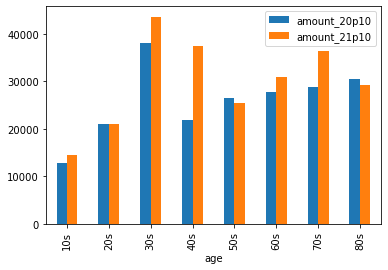

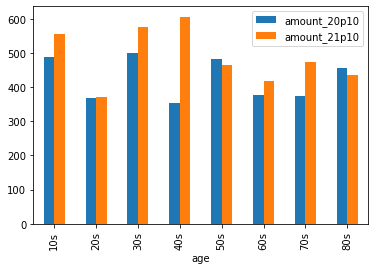

In [359]:
df6 = df_cus.copy()
df7 = df6[(df6.gender == 'male')].loc[:,['gender', 'age', 'amount_20p10', 'amount_21p10']]

print(df7.gender.unique())
df7.drop(columns=['gender'], inplace=True)
g_age = df7.groupby('age')
g_age.agg({'amount_20p10': 'sum', 'amount_21p10': 'sum'}).plot(kind='bar')


g_age.agg({'amount_20p10': 'mean', 'amount_21p10': 'mean'}).plot(kind='bar')

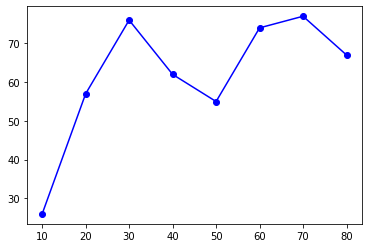

In [360]:
df7.replace({'10s':10, '20s':20, '30s':30, '40s':40, '50s':50, '60s':60, '70s':70,  '80s':80}, inplace=True)
list_agesum = []
for i in range(10, 90, 10):
    list_agesum.append((df7.age == i).sum())
plt.plot(list(range(10, 90, 10)), list_agesum, 'bo-')

#### 50대가 말을 안듣는다. 왜 말을 안듣지?
- male, 50s, product == 10

In [361]:
df.rename({'product':'product_'}, inplace=True, axis=1)
df.head() # 조작전

,orderno,date,day,time,cus_id,product_,price,quantity,amount,gender,age,region
0,0,2020-01-01,Wed,03:35:15,733,20,14440,56,808640,0,72,0
1,1,2020-01-01,Wed,06:46:52,692,10,40740,49,1996260,1,63,2
2,2,2020-01-01,Wed,07:54:42,764,30,5520,2,11040,0,76,1
3,3,2020-01-01,Wed,09:10:55,459,30,8630,4,34520,1,31,0
4,4,2020-01-01,Wed,13:30:43,760,20,19970,6,119820,0,89,0


In [362]:
df_mod = df4.copy()
df_mod.head() # 조작후

,orderno,date,day,time,cus_id,product_,price,quantity,amount,gender,age,region
0,0,2020-01-01,Wed,03:35:15,733,20,14440,56,808640,0,72,0
1,1,2020-01-01,Wed,06:46:52,692,10,40740,49,1996260,1,63,2
2,2,2020-01-01,Wed,07:54:42,764,30,5520,2,11040,0,76,1
3,3,2020-01-01,Wed,09:10:55,459,30,8630,4,34520,1,31,0
4,4,2020-01-01,Wed,13:30:43,760,20,19970,6,119820,0,89,0


- 2021년, male, 50s, p10 조건으로 조작전/조작후 quentity, amount 줄었는지 확인. .. . ...

In [363]:
condition5 = (df.date.dt.year == 2021)&(df.gender == 0)&((df.age >= 50)&(df.age < 60))&(df.product_ == 10)
df_bm = df[condition5]
df_bm.head()

,orderno,date,day,time,cus_id,product_,price,quantity,amount,gender,age,region
5045,5045,2021-01-01,Fri,05:25:01,123,10,43590,53,2310270,0,51,0
5089,5089,2021-01-04,Mon,09:31:24,614,10,32760,76,2489760,0,57,1
5132,5132,2021-01-07,Thu,08:29:03,320,10,49380,60,2962800,0,53,0
5197,5197,2021-01-13,Wed,12:43:10,353,10,33890,95,3219550,0,52,2
5347,5347,2021-01-23,Sat,20:06:03,348,10,33230,24,797520,0,58,0


In [364]:
df_am = df_mod[condition5]
df_am.head()

,orderno,date,day,time,cus_id,product_,price,quantity,amount,gender,age,region
5045,5045,2021-01-01,Fri,05:25:01,123,10,43590,84,3661560,0,51,0
5089,5089,2021-01-04,Mon,09:31:24,614,10,32760,121,3963960,0,57,1
5132,5132,2021-01-07,Thu,08:29:03,320,10,49380,60,2962800,0,53,0
5197,5197,2021-01-13,Wed,12:43:10,353,10,33890,95,3219550,0,52,2
5347,5347,2021-01-23,Sat,20:06:03,348,10,33230,24,797520,0,58,0


In [365]:
df_qdif = df_am.quantity - df_bm.quantity
df_qdif.sum()

1196

In [366]:
(df_qdif == 0).sum(), (df_qdif != 0).sum()

(56, 46)

In [367]:
df_amdif = df_am.amount - df_bm.amount
round(df_amdif.sum()/10**7, 1), '천만원'

(4.9, '천만원')

In [368]:
round(df_bm.amount.sum()/10**7, 1), '천만원 -> ', round(df_am.amount.sum()/10**7, 1), '천만원'

(20.2, '천만원 -> ', 25.0, '천만원')

- 분명 늘었다, 그렇다면 1. 요약 OR 2. 시각화에서 잘못됨.

- 1.요약은 문제 없음~~..

#### 조작전(df_c1)/ 조작후(df_cus) 비교 시각화
- 남성, 고가,,, 나이로 보기

In [509]:
df_cus1 = df_cus.copy()
df_cus1.head()

,cus_id,gender,age,region,amount_20p10,amount_20p20,amount_20p30,amount_21p10,amount_21p20,amount_21p30
0,0,male,30s,cityA,660,145,0,0,0,0
1,1,male,60s,cityC,223,467,0,909,166,0
2,2,female,30s,cityC,182,0,45,0,67,0
3,3,male,20s,cityC,223,415,52,639,321,50
4,4,male,40s,cityB,302,98,3,118,258,61


In [510]:
df_cus2 = df_cus1[(df_cus1.gender == 'male')]
g_male = df_cus2.groupby(['age'])

In [511]:
sss = g_male.agg({'amount_21p10': 'sum'})
sss

,amount_21p10
age,
10s,14458
20s,21141
30s,43650
40s,37562
50s,25482
60s,30840
70s,36510
80s,29182


In [512]:
df_c2 = df_c1.copy()
df_c2.head()

,cus_id,gender,age,region,amount_20p10,amount_20p20,amount_20p30,amount_21p10,amount_21p20,amount_21p30
0,0,male,30s,cityA,660,145,0,0,0,0
1,1,male,60s,cityC,223,467,0,909,166,0
2,2,female,30s,cityC,182,0,45,0,216,0
3,3,male,20s,cityC,223,415,52,639,321,50
4,4,male,40s,cityB,302,98,3,118,258,61


In [513]:
df_c2 = df_c2[(df_c2.gender == 'male')]
g_male_2 = df_c2.groupby(['age'])
ssss = g_male_2.agg({'amount_21p10': 'sum'})


df_c2 = df_c2[(df_c2.gender == 'male')]
g_male_3 = df_c2.groupby(['age'])
sssss = g_male_3.agg({'amount_20p10': 'sum'})

In [514]:
after = sss.amount_21p10.to_dict()
before = ssss.amount_21p10.to_dict()
twenty0 = sssss.amount_20p10.to_dict()
twenty0, before, after

({'10s': 12720,
  '20s': 21000,
  '30s': 38069,
  '40s': 21864,
  '50s': 26566,
  '60s': 27842,
  '70s': 28760,
  '80s': 30451},
 {'10s': 14458,
  '20s': 20310,
  '30s': 34478,
  '40s': 29588,
  '50s': 20879,
  '60s': 30840,
  '70s': 36510,
  '80s': 29182},
 {'10s': 14458,
  '20s': 21141,
  '30s': 43650,
  '40s': 37562,
  '50s': 25482,
  '60s': 30840,
  '70s': 36510,
  '80s': 29182})

In [515]:
ages = pd.Series(list(before))

In [516]:
before = pd.Series(list(before.values()))

In [517]:
after = pd.Series(list(after.values()))

In [518]:
twenty0 = pd.Series(list(twenty0.values()))

In [519]:
twenty0

0    12720
1    21000
2    38069
3    21864
4    26566
5    27842
6    28760
7    30451
dtype: int64

In [520]:
df_dtd = pd.concat([ages, twenty0, before], axis=1)
df_dtd.rename({0: 'ages', 1: 'twenty0', 2:'before'}, inplace=True, axis=1)

df_dtd2 = pd.concat([ages, twenty0, after], axis=1)
df_dtd2.rename({0: 'ages', 1: 'twenty0', 2:'after'}, inplace=True, axis=1)

<AxesSubplot:xlabel='ages'>

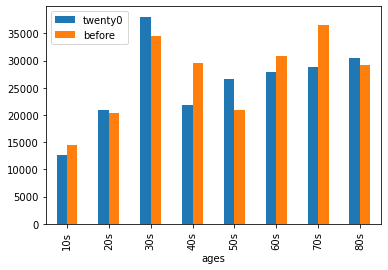

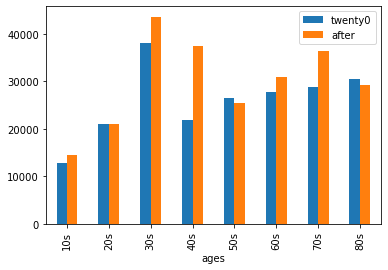

In [521]:
df_dtd.set_index('ages', inplace=True)
df_dtd2.set_index('ages', inplace=True)

df_dtd.plot.bar()
df_dtd2.plot.bar()

In [507]:
df_dtd

,twenty0,before
ages,,
10s,12720,14458
20s,21000,20310
30s,38069,34478
40s,21864,29588
50s,26566,20879
60s,27842,30840
70s,28760,36510
80s,30451,29182


### 여성, 20-40대, 저가 -> 매출 증가

- 여성, 저가 뽑아서 나이별 확인

['female']
Categories (2, object): ['female', 'male']


<AxesSubplot:xlabel='age'>

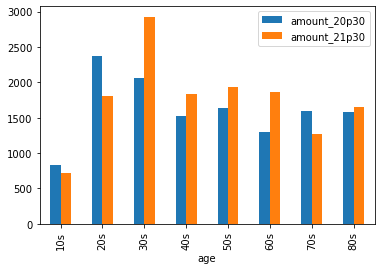

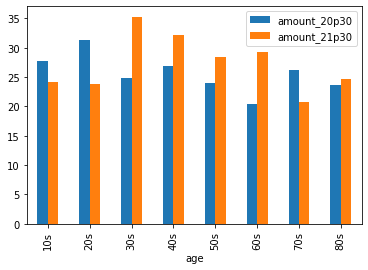

In [369]:
df8 = df_cus.copy()
df9 = df8[(df8.gender == 'female')].loc[:,['gender', 'age', 'amount_20p30', 'amount_21p30']]

print(df9.gender.unique())
df9.drop(columns=['gender'], inplace=True)
g_age = df9.groupby('age')
g_age.agg({'amount_20p30': 'sum', 'amount_21p30': 'sum'}).plot(kind='bar')
g_age.agg({'amount_20p30': 'mean', 'amount_21p30': 'mean'}).plot(kind='bar')

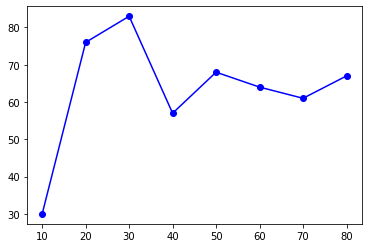

In [370]:
df9.replace({'10s':10, '20s':20, '30s':30, '40s':40, '50s':50, '60s':60, '70s':70,  '80s':80}, inplace=True)
list_agesum = []
for i in range(10, 90, 10):
    list_agesum.append((df9.age == i).sum())
plt.plot(list(range(10, 90, 10)), list_agesum, 'bo-')

### 여성, 20-40대, 중&고가 -> 매출 감소

### D도시, 저가 -> 매출 감소
- 인데 지금 데이터에는 D도시가 없어서 B도시(region = 1)로 조작했음